In [1]:
from keras.models import clone_model
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import progressbar
import time
import util

Using TensorFlow backend.


In [2]:
def syncModels(target_model):
    new_model = util.createModel(0.001)
    target_model = clone_model(new_model)
    target_model.set_weights(new_model.get_weights())

In [11]:
target_model = util.createModel(0.001)
timings = []
bar = progressbar.ProgressBar()
for i in bar(range(int(2e4))):
    demo_minibatch = [[np.random.randint(9), np.random.randint(9)] for _ in range(32)]
    if i % 1000 == 0:
        syncModels(target_model)
        target_model.set_weights(np.asarray(target_model.get_weights()) + np.random.uniform())
    start_time = time.time()
    target_model.predict(np.asarray(demo_minibatch))
    timings.append(time.time() - start_time)

100% (20000 of 20000) |##################| Elapsed Time: 0:01:16 Time:  0:01:16


In [13]:
target_model.get_weights()

[array([[ 9.822376 ,  9.872054 , 10.178028 ,  9.757039 ,  9.810946 ,
          9.342943 , 10.0436325, 10.374304 ,  9.852768 ,  9.590931 ,
          9.469362 , 10.251792 ,  9.829036 ,  9.339286 , 10.397183 ,
          9.9868765],
        [ 9.6566305, 10.213317 ,  9.503201 ,  9.583762 , 10.462548 ,
          9.44364  , 10.002374 , 10.018571 ,  9.826713 ,  9.326704 ,
          9.7816925,  9.446977 ,  9.528548 ,  9.545225 ,  9.368934 ,
          9.9991865]], dtype=float32),
 array([9.890364, 9.890364, 9.890364, 9.890364, 9.890364, 9.890364,
        9.890364, 9.890364, 9.890364, 9.890364, 9.890364, 9.890364,
        9.890364, 9.890364, 9.890364, 9.890364], dtype=float32),
 array([[10.110461 , 10.15337  ,  9.979401 , 10.14947  , 10.001364 ,
         10.071091 , 10.224658 ,  9.69548  ],
        [10.249536 , 10.089673 , 10.292707 ,  9.412033 ,  9.593855 ,
         10.011313 ,  9.499792 , 10.202067 ],
        [ 9.608887 ,  9.648381 ,  9.850054 ,  9.768242 ,  9.9975815,
          9.651763 ,  9.6

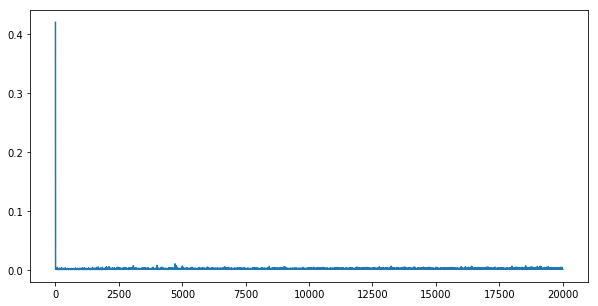

In [18]:
_f, ax = plt.subplots(figsize=(10,5))
plt.style.use('seaborn-muted')
ax.plot(timings)